In [4]:
from torch import optim
from stock_loader import load_stock_data
from sinusoidal import load_sinusoidal_data
from model_fit_evaluate import train_and_test
from qubit_rnn import QRNN
from mapped_rnn import ClassicalMappedQRNN
from tracker import ModelPerformanceTracker
from qiskit.circuit.library import RYGate, RXGate, RZGate
from simple_lstm import LSTM
from simple_rnn import RNN

import warnings


warnings.filterwarnings("ignore", category=UserWarning, module="qiskit_machine_learning")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="qiskit")

In [5]:
sequence_length = 5
batch_size = 5
epochs = 10

stock_data = load_stock_data('^KS200', '2023-01-01', '2024-01-01', '1wk', sequence_length, batch_size)
sinusoidal_data = load_sinusoidal_data(sequence_length=sequence_length, num_samples=50, batch_size=batch_size)

/home/cup/quantum computing/QRNN/QRNN/stock_loader.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
[*********************100%***********************]  1 of 1 completed


In [6]:
# Initialize models
qrnn_yxz_model = QRNN(sequence_length, gates=(RYGate, RXGate, RZGate))
qrnn_yyy_model = QRNN(sequence_length, gates=(RYGate, RYGate, RYGate))
qrnn_yxx_model = QRNN(sequence_length, gates=(RYGate, RXGate, RXGate))
qrnn_yyz_model = QRNN(sequence_length, gates=(RYGate, RYGate, RZGate))
rnn_model = RNN(input_size=1, hidden_size=4, num_layers=1)
lstm_model = LSTM(input_size=1, hidden_size=4, num_layers=1)

# Optimizers
qrnn_yxz_optimizer = optim.Adam(qrnn_yxz_model.parameters(), lr=0.01)
qrnn_yyy_optimizer = optim.Adam(qrnn_yyy_model.parameters(), lr=0.01)
qrnn_yxx_optimizer = optim.Adam(qrnn_yxx_model.parameters(), lr=0.01)
qrnn_yyz_optimizer = optim.Adam(qrnn_yyz_model.parameters(), lr=0.01)
rnn_optimizer = optim.Adam(rnn_model.parameters(), lr=0.01)
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.01)

Training LSTM: 100%|██████████| 10/10 [00:00<00:00, 22.05epoch/s, Train Loss=0.0243, Valid Loss=0.0475, Epoch Time (s)=0.04]


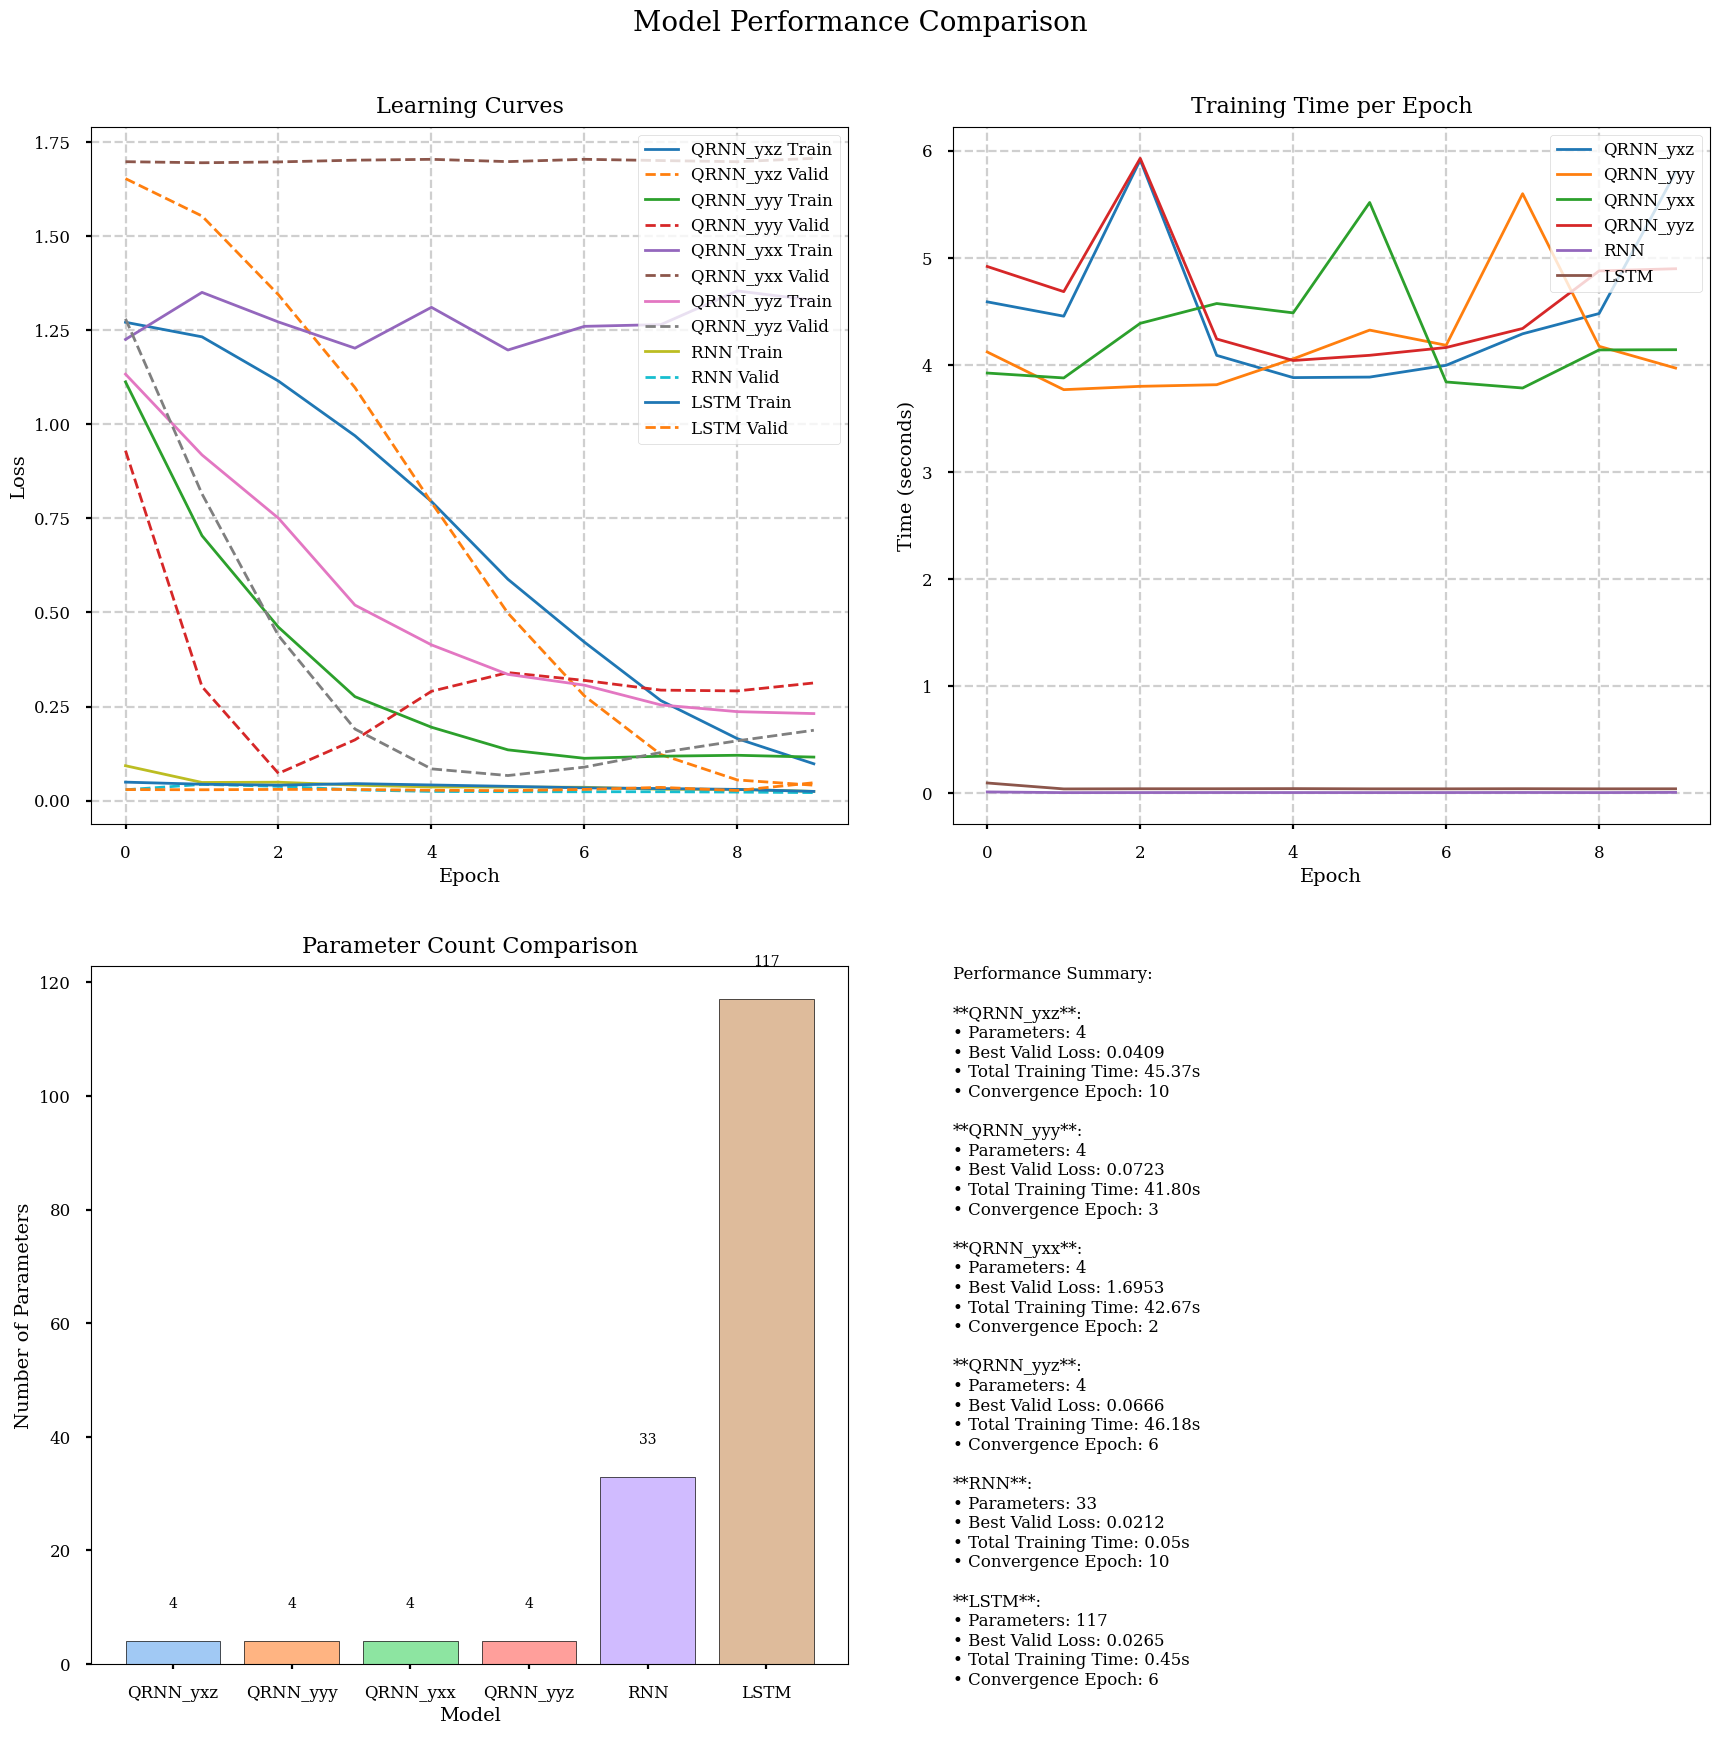

In [7]:
# Train and test each model (stock_data)
tracker = ModelPerformanceTracker()

train_and_test(qrnn_yxz_model, qrnn_yxz_optimizer, stock_data, epochs=epochs, model_name="QRNN_yxz", tracker=tracker)
train_and_test(qrnn_yyy_model, qrnn_yyy_optimizer, stock_data, epochs=epochs, model_name="QRNN_yyy", tracker=tracker)
train_and_test(qrnn_yxx_model, qrnn_yxx_optimizer, stock_data, epochs=epochs, model_name="QRNN_yxx", tracker=tracker)
train_and_test(qrnn_yyz_model, qrnn_yyz_optimizer, stock_data, epochs=epochs, model_name="QRNN_yyz", tracker=tracker)
train_and_test(rnn_model, rnn_optimizer, stock_data, epochs=epochs, model_name="RNN", tracker=tracker)
train_and_test(lstm_model, lstm_optimizer, stock_data, epochs=epochs, model_name="LSTM", tracker=tracker)

tracker.plot_performance_comparison()

Training LSTM: 100%|██████████| 10/10 [00:00<00:00, 26.91epoch/s, Train Loss=0.0396, Valid Loss=0.0422, Epoch Time (s)=0.04]


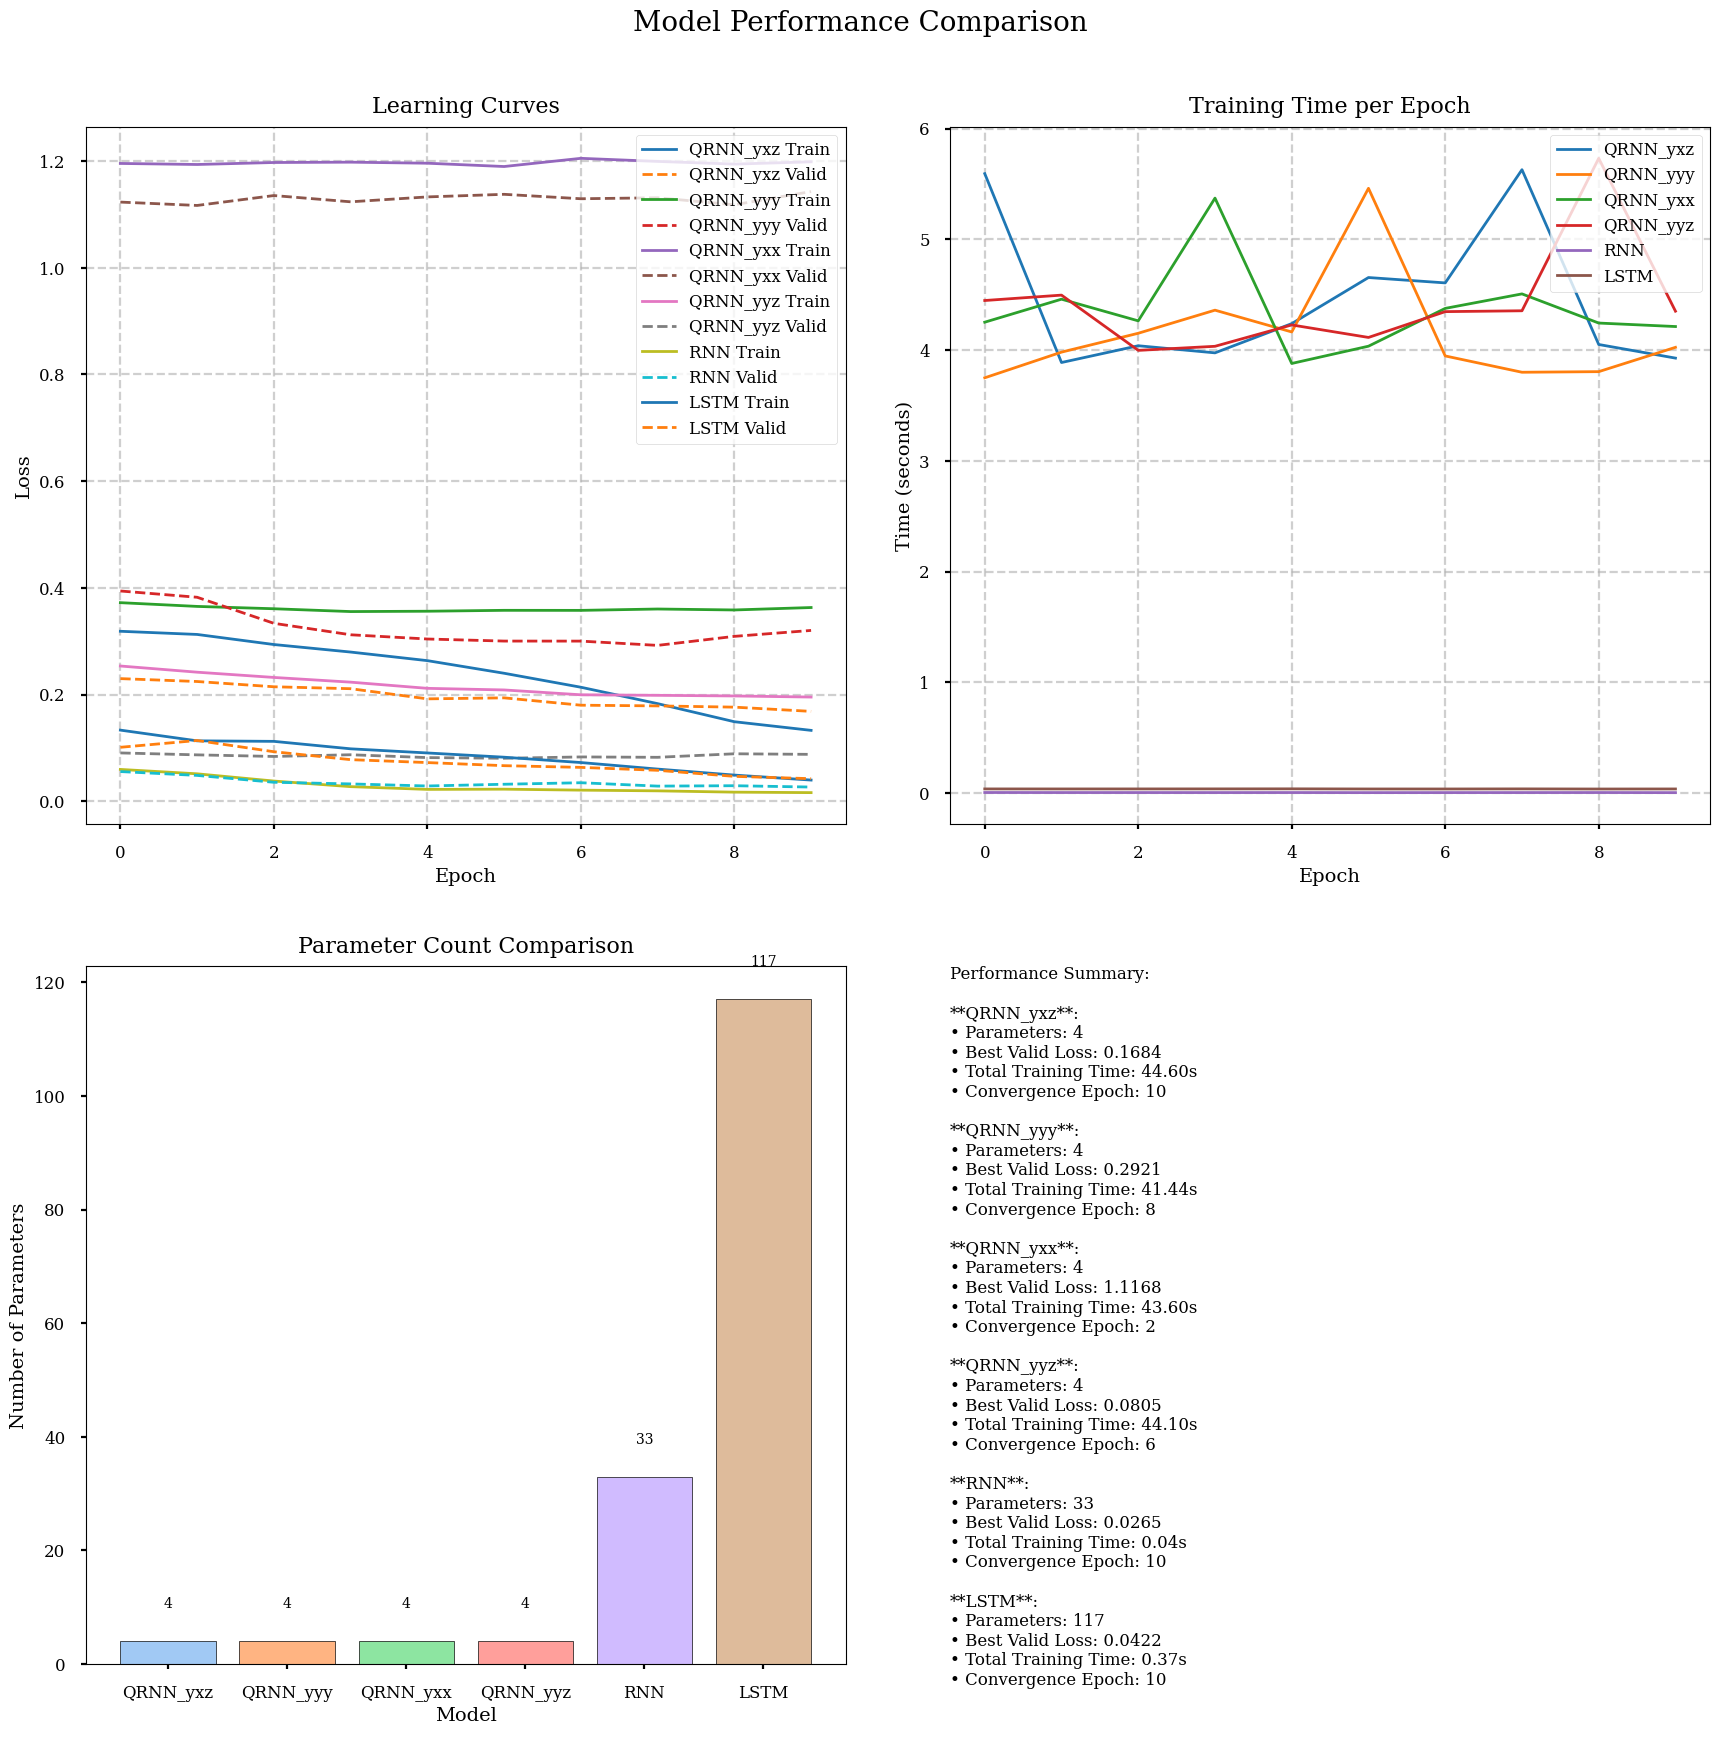

In [8]:
# Train and test each model (sinusoidal_data)
tracker = ModelPerformanceTracker()

train_and_test(qrnn_yxz_model, qrnn_yxz_optimizer, sinusoidal_data, epochs=epochs, model_name="QRNN_yxz", tracker=tracker)
train_and_test(qrnn_yyy_model, qrnn_yyy_optimizer, sinusoidal_data, epochs=epochs, model_name="QRNN_yyy", tracker=tracker)
train_and_test(qrnn_yxx_model, qrnn_yxx_optimizer, sinusoidal_data, epochs=epochs, model_name="QRNN_yxx", tracker=tracker)
train_and_test(qrnn_yyz_model, qrnn_yyz_optimizer, sinusoidal_data, epochs=epochs, model_name="QRNN_yyz", tracker=tracker)
train_and_test(rnn_model, rnn_optimizer, sinusoidal_data, epochs=epochs, model_name="RNN", tracker=tracker)
train_and_test(lstm_model, lstm_optimizer, sinusoidal_data, epochs=epochs, model_name="LSTM", tracker=tracker)

tracker.plot_performance_comparison()